In [1]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
def load_system_matrix(filename):
    data = scipy.io.loadmat(filename)
    K = data['K'][0]
    return K
def load_sensordata(filename):
    data = scipy.io.loadmat(filename)
    sensor_data_noisy = data['sensor_data_noisy']
    p_recorded = data['p_recorded']
    medium = data['medium']
    sensor = data['sensor']
    return sensor_data_noisy, p_recorded, medium, sensor

system_matrix = load_system_matrix('system_matrix.mat')
sensor_data_noisy, p_recorded, medium, sensor = load_sensordata('sensor_data_noisy')


The mode shapes in a rectangular domain with lengths \(L_x\) and \(L_y\) are given by:
$$
\[
\phi_{n,m}(x, y) = \sqrt{\frac{4}{L_x L_y}} \sin\left(\frac{n \pi x}{L_x}\right) \sin\left(\frac{m \pi y}{L_y}\right)
\]
$$

In [3]:
# process K for TwIST algorithm
def process_K(system_matrix):
    i = 0 # pixel index
    processed_system_matrix = []
    for num, i in enumerate(system_matrix):
        processed_system_matrix.append(i[0])
    return processed_system_matrix

system_matrix = process_K(system_matrix)

In [4]:
system_matrix[10].shape

(600,)

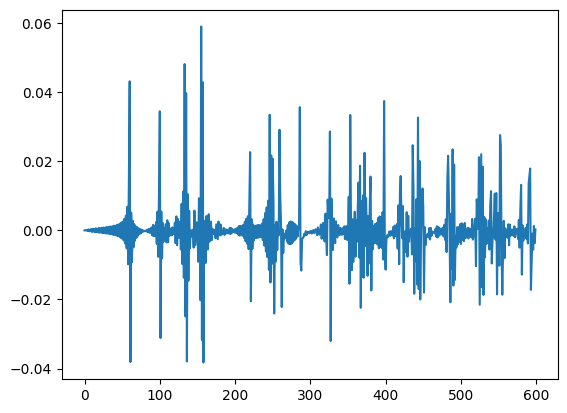

In [5]:
plt.plot(system_matrix[10])

In [6]:
import importlib.util
import os, sys

# Define the path to the TwIST.py file

sys.path.append('gitclone/Image-Restoration-Algorithm-TwIST')


from TwIST import TwIST, TwIST2

ValueError: operands could not be broadcast together with shapes (1000,1) (192,1) 

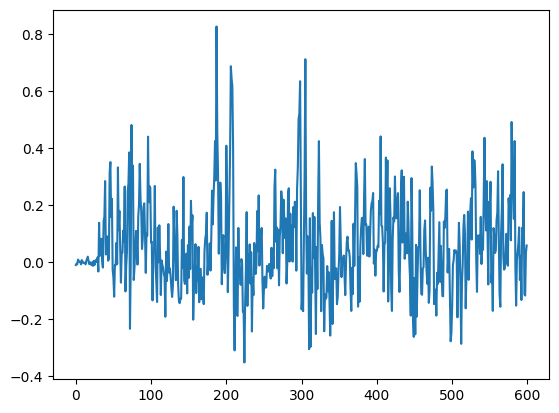

In [ ]:
plt.plot(p_recorded)

In [ ]:
A = np.array([[0.5, 0.2, 0.1],
              [0.1, 0.7, 0.2],
              [0.3, 0.2, 0.8]])

# Define desampleConvolvedNoise (3x1)
desampleConvolvedNoise = np.array([[0.6],
                                   [0.9],
                                   [1.2]])

# Define realSignal (3x1)
realSignal = np.array([[1.0],
                       [1.5],
                       [2.0]])
tau = 0.1
alpha = 1.0
beta = 0.5


#  test matrixes
x = TwIST(desampleConvolvedNoise, A, tau, realSignal, alpha, beta)
print("Reconstructed signal:", x)

In [ ]:
x = TwIST2(desampleConvolvedNoise=p_recorded, A=system_matrix, realSignal=p_recorded , tau=0.1, alpha=1, beta=1)

NameError: name 'TwIST2' is not defined